# Blind Vision

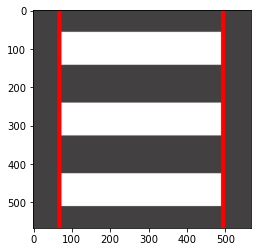

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read in the image
img = cv2.imread('imgs/simple_straight.jpg', cv2.IMREAD_COLOR)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find edges with Canny Edge Detection
edges = cv2.Canny(gray, 50, 200)

# Detect points that form a line
lines = cv2.HoughLines(image=edges, rho=1, theta=np.pi/180, threshold=100)

# Loop through each line found by the Hough Line Transfrom
for line in lines:
    rho = line[0][0] # Extract the line's rho (distance from 0,0)
    theta = line[0][1] # Extract the line's theta (rotation angle in radians) 
    
    # Only add lines that are less than 90 degrees
    if theta < 1.5:
        # Calculate the points
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        point1 = (x1, y1)
        point2 = (x2, y2)
        # Draw lines between points
        cv2.line(img, point1, point2, (255,0,0), 10)

# Display the lines on the image
plt.imshow(img)